<a href="https://colab.research.google.com/github/jimmynewland/colabnotebooks/blob/main/Ball_Toss_Data_Investigation_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using CS and DS to Learn Science

Bringing both computation and data science tools together in a domain-specific context can actually help students learn the content from the specific subject while building efficacy in the other areas.

The goal is to make sure the computer science and data science tools do not increase the cognitive load so much that learning the specific domain knowledge is negatively impacted.

In [1]:
#@title Import Libraries
import pandas as pd # pandas is a data science libary
import matplotlib.pyplot as plt # standard plotting librar

##Tidy Data

This dataset came from tracking the horizontal and vertical position of a ball thrown in an arc.

This dataset is 'tidy' because it is ready to plot with no strange or missing values and clearly identified column names.

How many columns do we have in the dataset? What sort of data is it? If it matters, do we know what the units might be?

We are using pandas which is a very common tool for handling tabular data.

This is an attempt to bring good data science pedagogy to bear on learning the basics of motion.

The statistical problem solving cycle:
* Ask a question that needs data and some stats to answer
* Collect new or existing data that can used towards getting the answer
* Assess, clean, and organize the data to find a way to get at the answer
* Analyze the data using the appropriate computational and statistical tools
* Visualize and interpret the data to tell a story that addresses the question


##What questions should we answer?

Our questions:
* Is this ball going the same speed the whole time along the arc?
* How is motion parallel to the ground different than the motion perpendicular to the ground?
* Can we find a way to measure the gravitational acceleration, $g$?

In [2]:
#@title Load Position, Time, and Speed Data
df = pd.read_csv("http://thinkingwithcode.com/datascience/hous-coding-ball-toss-data.csv")
df.head()

,t (s),x (m),y (m),vy (m/s)
0,0.0333,0.0534,0.081,2.180
1,0.0667,0.1060,0.148,1.870
2,0.1000,0.1590,0.206,1.570
3,0.1330,0.2120,0.253,1.260
4,0.1670,0.2650,0.289,0.949


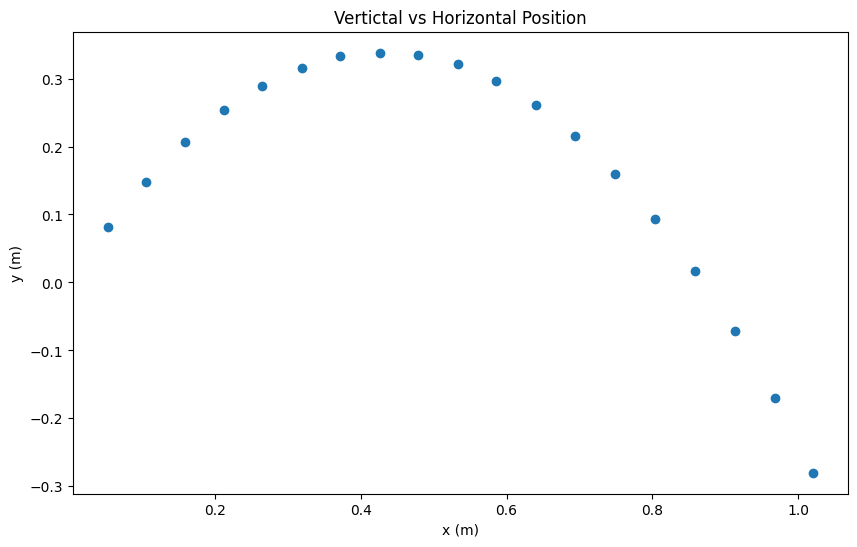

In [3]:
#@title Plot the Horizontal Position vs Vertical Position
x_axis = df['x (m)']
y_axis = df['y (m)']

plt.figure(figsize=(10, 6))
plt.title("Vertictal vs Horizontal Position")

plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.scatter(x_axis,y_axis)

plt.show()

In [4]:
def makePlot(xAxisLabel, yAxisLabel,title):
  x_axis = df[xAxisLabel]
  y_axis = df[yAxisLabel]

  plt.figure(figsize=(10, 6))
  plt.title(title)
  plt.xlabel(xAxisLabel)
  plt.ylabel(yAxisLabel)

  plt.scatter(x_axis,y_axis)

  plt.show()

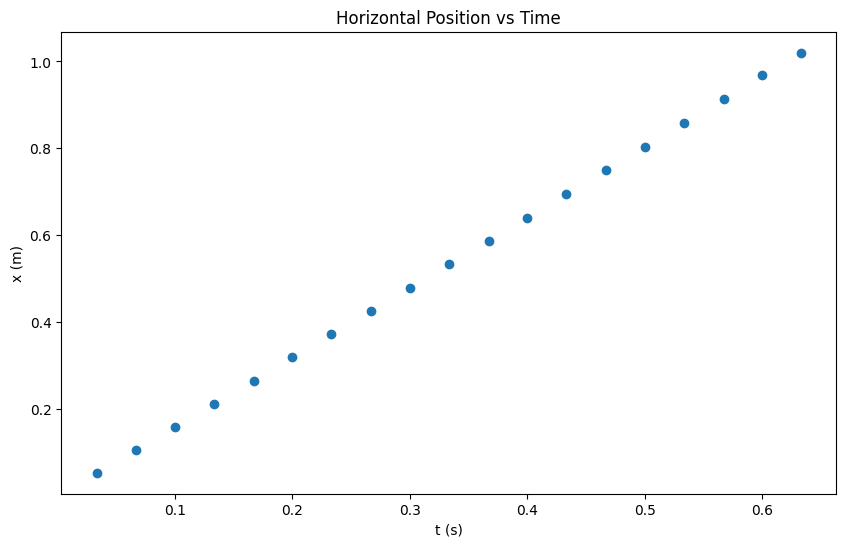

In [5]:
#@title Plot the Horizontal Position vs Time
makePlot('t (s)', 'x (m)', 'Horizontal Position vs Time')

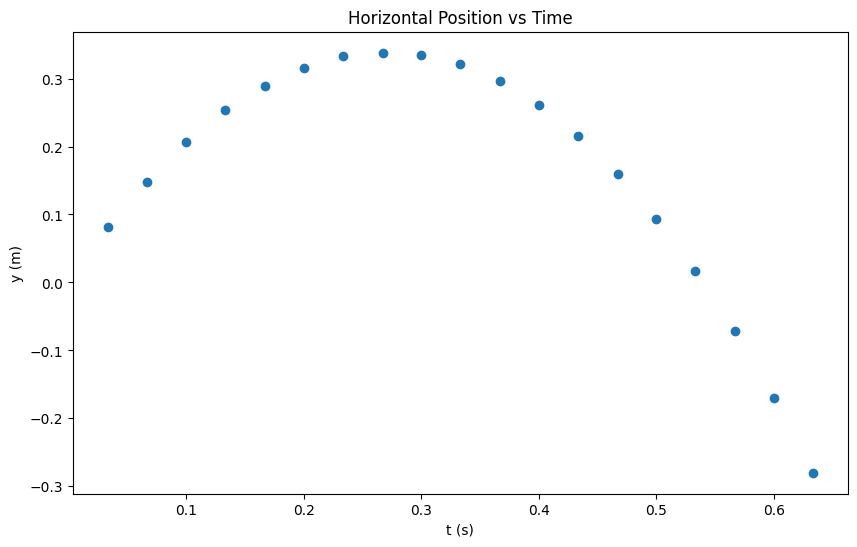

In [6]:
#@title Plot the Vertical Position vs Time
makePlot('t (s)', 'y (m)', 'Horizontal Position vs Time')

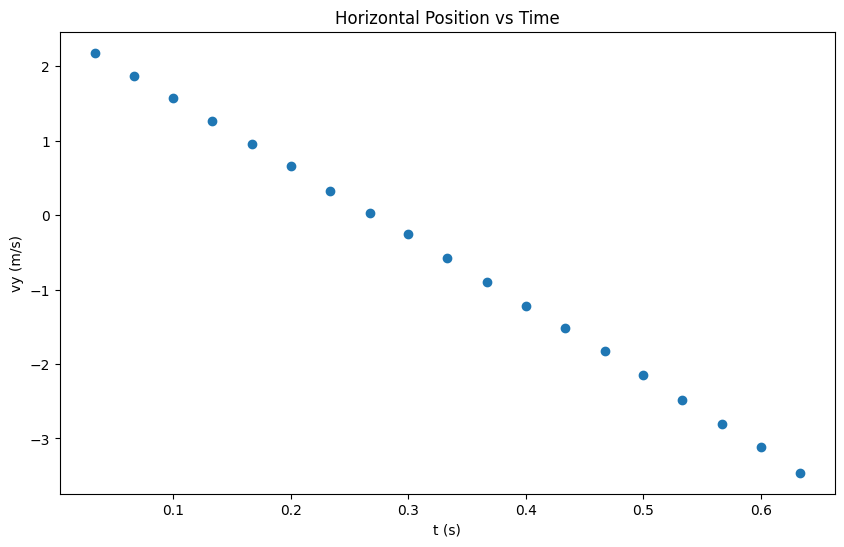

In [7]:
#@title Plot the Vertical Speed vs Time
makePlot('t (s)', 'vy (m/s)', 'Horizontal Position vs Time')

#Inference with Statistics

In [8]:
from scipy.stats import linregress

t = df['t (s)']
x = df['x (m)']
vy = df['vy (m/s)']

vx, intercept1, r_value1, p_value1, std_err1 = linregress(t,x)
ay, intercept2, r_value2, p_value2, std_err2 = linregress(t, vy)

In [9]:
print(f'v_x = {v_x:.2f} (m/s) & a_y = {a_y:.2f} (m/s^2)')

NameError: name 'v_x' is not defined

##Let's answer our questions

Our questions:
* Is this ball going the same speed the whole time along the arc?
* How is motion parallel to the ground different than the motion perpendicular to the ground?
* Can we find a way to measure the gravitational acceleration, $g$?